In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('pokemon_data.csv', index_col = 0)

In [3]:
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


In [4]:
df.shape

(800, 11)

In [5]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

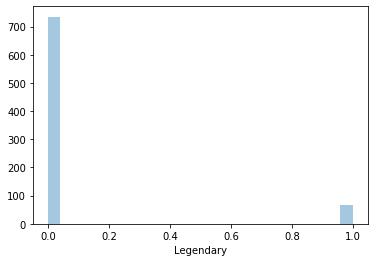

In [6]:
sns.distplot(df['Legendary'], kde = False, bins = 25)

In [7]:
df['Type 1'].value_counts().shape

(18,)

In [8]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [9]:
df[(df['Type 1'] == 'Flying') & (df['Legendary'] == True)].shape

(2, 11)

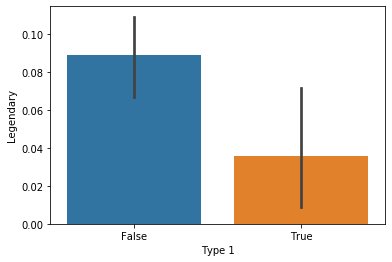

In [10]:
sns.barplot(x = (df['Type 1'] == 'Water'), y = df['Legendary'])


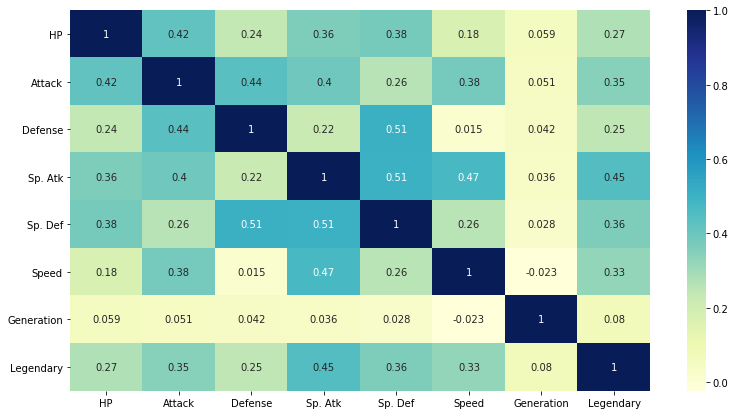

In [11]:
plt.figure(figsize = (13, 7))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

In [12]:
dataset_table = pd.crosstab(df['Legendary'], df['Type 1'])
print(dataset_table)

Type 1     Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
Legendary                                                                      
False       69    29      20        40     16        27    47       2     30   
True         0     2      12         4      1         0     5       2      2   

Type 1     Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
Legendary                                                                   
False         67      28   22      96      28       43    40     23    108  
True           3       4    2       2       0       14     4      4      4  


In [13]:
dataset_table.values

array([[ 69,  29,  20,  40,  16,  27,  47,   2,  30,  67,  28,  22,  96,
         28,  43,  40,  23, 108],
       [  0,   2,  12,   4,   1,   0,   5,   2,   2,   3,   4,   2,   2,
          0,  14,   4,   4,   4]], dtype=int64)

In [14]:
obs_values = dataset_table.values

In [15]:
val = stats.chi2_contingency(dataset_table)
val # chi2 value, p-value, degrees of freedom, expected values

(90.4204913058596,
 5.118547414721704e-12,
 17,
 array([[ 63.39375,  28.48125,  29.4    ,  40.425  ,  15.61875,  24.80625,
          47.775  ,   3.675  ,  29.4    ,  64.3125 ,  29.4    ,  22.05   ,
          90.0375 ,  25.725  ,  52.36875,  40.425  ,  24.80625, 102.9    ],
        [  5.60625,   2.51875,   2.6    ,   3.575  ,   1.38125,   2.19375,
           4.225  ,   0.325  ,   2.6    ,   5.6875 ,   2.6    ,   1.95   ,
           7.9625 ,   2.275  ,   4.63125,   3.575  ,   2.19375,   9.1    ]]))

In [16]:
exp_values = val[3]

In [17]:
from scipy.stats import chi2
chi_square = sum([ (o - e)**2./e for o, e in zip(obs_values, exp_values)])


In [18]:
chi_square

array([6.10204082e+00, 1.16287706e-01, 3.69900576e+01, 5.49926264e-02,
       1.14538123e-01, 2.38775510e+00, 1.54731715e-01, 9.39612768e+00,
       1.50706436e-01, 1.38222322e+00, 8.20512821e-01, 1.39542997e-03,
       4.85970589e+00, 2.47619048e+00, 2.06285035e+01, 5.49926264e-02,
       1.61871814e+00, 3.11101144e+00])

In [19]:
chi_square[0]

6.102040816326531

In [20]:
sum(chi_square)

90.42049130585956

In [21]:
chi_square_statistic = sum(chi_square)

In [22]:
alpha = 0.05
critical_value = chi2.ppf(q = 1 - (alpha/2), df = val[2])
print(critical_value)

30.19100912163982


In [23]:
p_value = 1 - chi2.cdf(x = chi_square_statistic, df = val[2])
p_value

5.118572232731822e-12

In [24]:
if chi_square_statistic >= critical_value:
    print("Reject H0,There is a relationship between type of pokemon and whether it being legendary or not")
else:
    print("Accept H0,There is NO relationship between type of pokemon and whether it being legendary or not")
    
if p_value <= alpha:
    print("Reject H0,There is a relationship between type of pokemon and whether it being legendary or not")
else:
    print("Accept H0,There is NO relationship between type of pokemon and whether it being legendary or not")

Reject H0,There is a relationship between type of pokemon and whether it being legendary or not
Reject H0,There is a relationship between type of pokemon and whether it being legendary or not


In [25]:
65/800

0.08125

In [26]:
df['Type 2'].isnull().sum()

386

In [27]:
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [28]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [29]:
df['Type 2'].fillna('Notype', inplace = True)

In [30]:
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,Notype,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


In [31]:
df.isnull().sum()

Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [32]:
dataset_table_2 = pd.crosstab(df['Legendary'], df['Type 2'])
print(dataset_table_2)

Type 2     Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
Legendary                                                                      
False        3    19      14         5     21        22     9      84     13   
True         0     1       4         1      2         4     3      13      1   

Type 2     Grass  Ground  Ice  Normal  Notype  Poison  Psychic  Rock  Steel  \
Legendary                                                                     
False         25      34   11       4     361      34       28    14     21   
True           0       1    3       0      25       0        5     0      1   

Type 2     Water  
Legendary         
False         13  
True           1  


In [33]:
observed = dataset_table_2.values

In [34]:
val_2 = stats.chi2_contingency(dataset_table_2)
val_2 # chi2 value, p-value, degrees of freedom, expected values

(31.37853029311593,
 0.026015006240127522,
 18,
 array([[2.756250e+00, 1.837500e+01, 1.653750e+01, 5.512500e+00,
         2.113125e+01, 2.388750e+01, 1.102500e+01, 8.911875e+01,
         1.286250e+01, 2.296875e+01, 3.215625e+01, 1.286250e+01,
         3.675000e+00, 3.546375e+02, 3.123750e+01, 3.031875e+01,
         1.286250e+01, 2.021250e+01, 1.286250e+01],
        [2.437500e-01, 1.625000e+00, 1.462500e+00, 4.875000e-01,
         1.868750e+00, 2.112500e+00, 9.750000e-01, 7.881250e+00,
         1.137500e+00, 2.031250e+00, 2.843750e+00, 1.137500e+00,
         3.250000e-01, 3.136250e+01, 2.762500e+00, 2.681250e+00,
         1.137500e+00, 1.787500e+00, 1.137500e+00]]))

In [35]:
expected = val_2[3]
from scipy.stats import chi2
chi_sq = sum([ (o - e)**2./e for o, e in zip(observed, expected)])
chi_sq


array([0.26530612, 0.26164312, 4.79202279, 0.58642944, 0.01003344,
       1.83560762, 4.57770801, 3.6185567 , 0.01809075, 2.21088435,
       1.30111385, 3.31927936, 0.3537415 , 1.40490696, 3.00680272,
       2.18259518, 1.23809524, 0.37762238, 0.01809075])

In [36]:
sum(chi_sq)

31.378530293115933

In [37]:
alpha = 0.05
critical_val = chi2.ppf(q = 1 - (alpha), df = val_2[2])
print(critical_val)

28.869299430392623


In [38]:
p_val = 1 - chi2.cdf(x = sum(chi_sq), df = val_2[2])
p_val

0.026015006240127425

In [39]:
if sum(chi_sq) >= critical_val:
    print("Reject H0,There is a relationship between type 2 of pokemon and whether it being legendary or not")
else:
    print("Accept H0,There is NO relationship between type 2 of pokemon and whether it being legendary or not")
    
if p_val <= alpha:
    print("Reject H0,There is a relationship between type 2 of pokemon and whether it being legendary or not")
else:
    print("Accept H0,There is NO relationship between type 2 of pokemon and whether it being legendary or not")

Reject H0,There is a relationship between type 2 of pokemon and whether it being legendary or not
Reject H0,There is a relationship between type 2 of pokemon and whether it being legendary or not


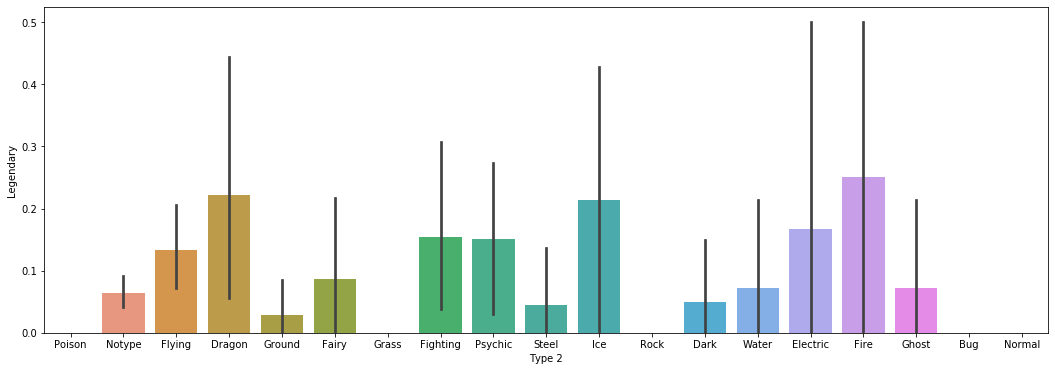

In [40]:
plt.figure(figsize=(18,6))
sns.barplot(x = df['Type 2'], y = df['Legendary'])

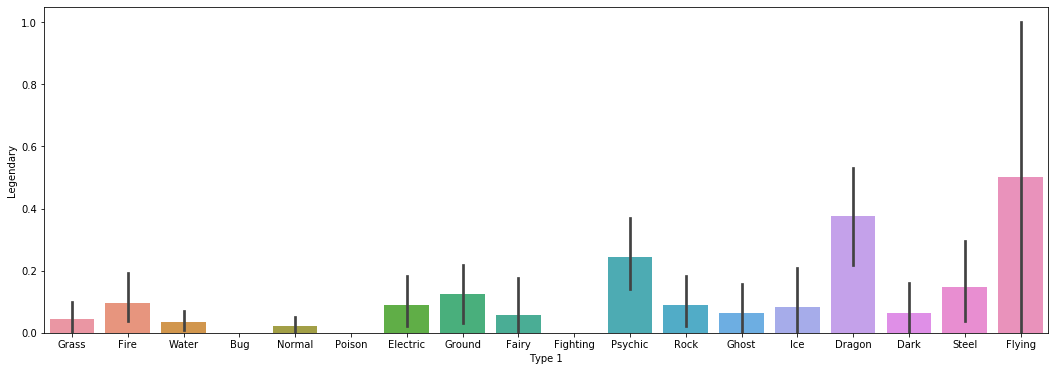

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x = df['Type 1'], y = df['Legendary'] == True)

In [42]:
df[(df['Type 1'] == 'Psychic') & (df['Legendary'] == True)]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
150,Mewtwo,Psychic,Notype,106,110,90,154,90,130,1,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
150,MewtwoMega Mewtwo Y,Psychic,Notype,106,150,70,194,120,140,1,True
249,Lugia,Psychic,Flying,106,90,130,90,154,110,2,True
386,DeoxysNormal Forme,Psychic,Notype,50,150,50,150,50,150,3,True
386,DeoxysAttack Forme,Psychic,Notype,50,180,20,180,20,150,3,True
386,DeoxysDefense Forme,Psychic,Notype,50,70,160,70,160,90,3,True
386,DeoxysSpeed Forme,Psychic,Notype,50,95,90,95,90,180,3,True
480,Uxie,Psychic,Notype,75,75,130,75,130,95,4,True


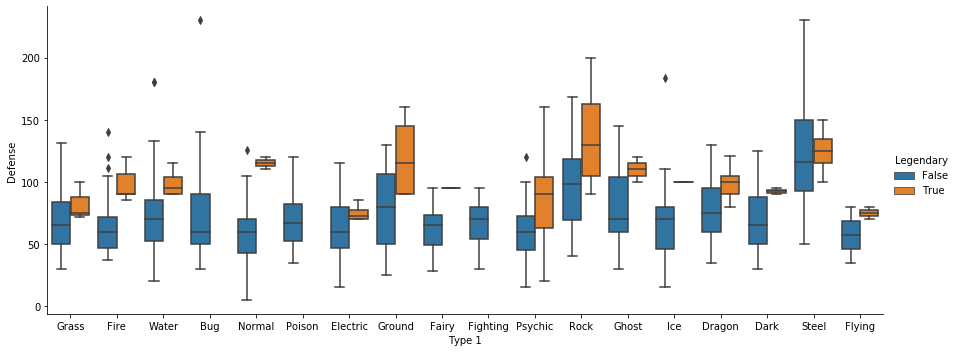

In [43]:

sns.catplot(x = 'Type 1', y = 'Defense', kind = 'box', hue = 'Legendary', data = df, height = 5, aspect = 2.5)
plt.show()

In [44]:
df[(df['Type 1'] == 'Fire')].sort_values('Name').head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
59,Arcanine,Fire,Notype,90,110,80,100,80,95,1,False
257,Blaziken,Fire,Fighting,80,120,70,110,70,80,3,False
257,BlazikenMega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False
654,Braixen,Fire,Notype,59,59,58,90,70,73,6,False
323,Camerupt,Fire,Ground,70,100,70,105,75,40,3,False


In [45]:
import re
df.loc[df['Name'].str.contains('^fe', flags = re.I, regex = True)].head(6)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
22,Fearow,Normal,Flying,65,90,65,61,61,100,1,False
160,Feraligatr,Water,Notype,85,105,100,79,83,78,2,False
349,Feebas,Water,Notype,20,15,20,10,55,80,3,False
597,Ferroseed,Grass,Steel,44,50,91,24,86,10,5,False
598,Ferrothorn,Grass,Steel,74,94,131,54,116,20,5,False
653,Fennekin,Fire,Notype,40,45,40,62,60,60,6,False


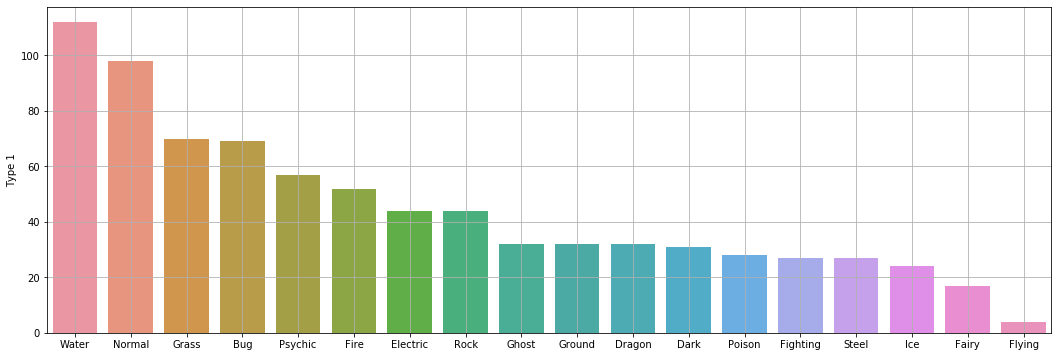

In [46]:
plt.figure(figsize=(18,6))
sns.barplot(x = df['Type 1'].value_counts().index, y = df['Type 1'].value_counts())
plt.grid(True)

In [47]:
df.to_csv('pokemon.csv')

In [51]:
data = df.sample(frac = 1)


In [58]:
data.tail(37)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
546,Cottonee,Grass,Fairy,40,27,60,37,50,66,5,False
85,Dodrio,Normal,Flying,60,110,70,60,60,100,1,False
689,Barbaracle,Rock,Water,72,105,115,54,86,68,6,False
707,Klefki,Steel,Fairy,57,80,91,80,87,75,6,False
358,Chimecho,Psychic,Notype,65,50,70,95,80,65,3,False
273,Seedot,Grass,Notype,40,40,50,30,30,30,3,False
47,Parasect,Bug,Grass,60,95,80,60,80,30,1,False
535,Tympole,Water,Notype,50,50,40,50,40,64,5,False
173,Cleffa,Fairy,Notype,50,25,28,45,55,15,2,False


In [56]:
data[data['Legendary'] == True]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
644,Zekrom,Dragon,Electric,100,150,120,120,100,90,5,True
381,Latios,Dragon,Psychic,80,90,80,130,110,110,3,True
245,Suicune,Water,Notype,100,75,115,90,115,85,2,True
491,Darkrai,Dark,Notype,70,90,90,135,90,125,4,True
492,ShayminLand Forme,Grass,Notype,100,100,100,100,100,100,4,True
...,...,...,...,...,...,...,...,...,...,...,...
483,Dialga,Steel,Dragon,100,120,120,150,100,90,4,True
243,Raikou,Electric,Notype,90,85,75,115,100,115,2,True
484,Palkia,Water,Dragon,90,120,100,150,120,100,4,True


In [59]:
data.to_csv('pokemon_2.csv')

In [63]:
df.shape

(800, 11)

In [70]:
x.shape

(800, 10)

In [72]:
y.shape

(800,)

In [76]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0:1])], remainder = 'passthrough')
#x = np.array(ct.fit_transform(x))
#print(x)

In [78]:
data.drop(columns = ['Type 2'], inplace = True)

In [79]:
data.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,
644,Zekrom,Dragon,100,150,120,120,100,90,5,True
67,Machoke,Fighting,80,100,70,50,60,45,1,False
74,Geodude,Rock,40,80,100,30,30,20,1,False
479,RotomMow Rotom,Electric,50,65,107,105,107,86,4,False
32,Nidoran (Male),Poison,46,57,40,40,40,50,1,False


In [81]:
new_data = pd.get_dummies(data, columns = ['Type 1'])

In [82]:
new_data.head()

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
#,,,,,,,,,,,,,,,,,,,,,
644,Zekrom,100,150,120,120,100,90,5,True,0,...,0,0,0,0,0,0,0,0,0,0
67,Machoke,80,100,70,50,60,45,1,False,0,...,0,0,0,0,0,0,0,0,0,0
74,Geodude,40,80,100,30,30,20,1,False,0,...,0,0,0,0,0,0,0,1,0,0
479,RotomMow Rotom,50,65,107,105,107,86,4,False,0,...,0,0,0,0,0,0,0,0,0,0
32,Nidoran (Male),46,57,40,40,40,50,1,False,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
new_data.to_csv('pokemon_3.csv')

In [86]:
new_data = new_data.drop(columns = ['Name'])

In [87]:
new_data

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,Type 1_Dark,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
#,,,,,,,,,,,,,,,,,,,,,
644,100,150,120,120,100,90,5,True,0,0,...,0,0,0,0,0,0,0,0,0,0
67,80,100,70,50,60,45,1,False,0,0,...,0,0,0,0,0,0,0,0,0,0
74,40,80,100,30,30,20,1,False,0,0,...,0,0,0,0,0,0,0,1,0,0
479,50,65,107,105,107,86,4,False,0,0,...,0,0,0,0,0,0,0,0,0,0
32,46,57,40,40,40,50,1,False,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,90,90,85,125,90,100,1,True,0,0,...,0,0,0,0,0,0,0,0,0,0
588,50,75,45,40,45,60,5,False,1,0,...,0,0,0,0,0,0,0,0,0,0
666,80,52,50,90,50,89,6,False,1,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
new_data.columns

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
       'Legendary', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon',
       'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire',
       'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground',
       'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic',
       'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water'],
      dtype='object')

In [90]:
new_data_2 = new_data[['Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon','Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire',
       'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground',
       'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic',
       'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
       'Legendary']]

In [91]:
new_data_2.head()

,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,...,Type 1_Steel,Type 1_Water,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,,,,,,,,,,
644,0,0,1,0,0,0,0,0,0,0,...,0,0,100,150,120,120,100,90,5,True
67,0,0,0,0,0,1,0,0,0,0,...,0,0,80,100,70,50,60,45,1,False
74,0,0,0,0,0,0,0,0,0,0,...,0,0,40,80,100,30,30,20,1,False
479,0,0,0,1,0,0,0,0,0,0,...,0,0,50,65,107,105,107,86,4,False
32,0,0,0,0,0,0,0,0,0,0,...,0,0,46,57,40,40,40,50,1,False


In [92]:
new_data_2.to_csv('pokemon_4.csv')

In [93]:
data

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,
644,Zekrom,Dragon,100,150,120,120,100,90,5,True
67,Machoke,Fighting,80,100,70,50,60,45,1,False
74,Geodude,Rock,40,80,100,30,30,20,1,False
479,RotomMow Rotom,Electric,50,65,107,105,107,86,4,False
32,Nidoran (Male),Poison,46,57,40,40,40,50,1,False
...,...,...,...,...,...,...,...,...,...,...
145,Zapdos,Electric,90,90,85,125,90,100,1,True
588,Karrablast,Bug,50,75,45,40,45,60,5,False
666,Vivillon,Bug,80,52,50,90,50,89,6,False


In [96]:
data.drop(columns = ['Name'], inplace = True)

In [97]:
data

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,
644,Dragon,100,150,120,120,100,90,5,True
67,Fighting,80,100,70,50,60,45,1,False
74,Rock,40,80,100,30,30,20,1,False
479,Electric,50,65,107,105,107,86,4,False
32,Poison,46,57,40,40,40,50,1,False
...,...,...,...,...,...,...,...,...,...
145,Electric,90,90,85,125,90,100,1,True
588,Bug,50,75,45,40,45,60,5,False
666,Bug,80,52,50,90,50,89,6,False


In [98]:
data.to_csv('pokemon_5.csv')